In [1]:
print("Hello World")

Hello World


In [9]:
import tensorflow as tf
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [4]:
len(gpus)

0

In [5]:
import cv2
import imghdr

C:\Users\royka\AppData\Local\Temp\ipykernel_8496\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir = "D:\\Programming\\PythonProject\\accessoriesclassify\\pc_parts"

In [7]:
img_exts = ['jpeg','jpg','bmp','png']

In [10]:
os.listdir(os.path.join(data_dir,'cables'))

['1.jpg',
 '10.jpg',
 '100.jpg',
 '101.jpg',
 '102.jpg',
 '103.jpg',
 '104.jpg',
 '105.jpg',
 '106.jpg',
 '107.jpg',
 '108.jpg',
 '109.jpg',
 '11.jpg',
 '110.jpg',
 '111.jpg',
 '112.jpg',
 '113.jpg',
 '114.jpg',
 '115.jpg',
 '116.jpg',
 '117.jpg',
 '118.jpg',
 '119.jpg',
 '12.jpg',
 '120.jpg',
 '121.jpg',
 '122.jpg',
 '123.jpg',
 '124.jpg',
 '125.jpg',
 '126.jpg',
 '127.jpg',
 '128.jpg',
 '129.jpg',
 '13.jpg',
 '130.jpg',
 '131.jpg',
 '132.jpg',
 '133.jpg',
 '134.jpg',
 '135.jpg',
 '136.jpg',
 '137.jpg',
 '138.jpg',
 '139.jpg',
 '14.jpg',
 '140.jpg',
 '141.jpg',
 '142.jpg',
 '143.jpg',
 '144.jpg',
 '145.jpg',
 '146.jpg',
 '147.jpg',
 '148.jpg',
 '149.jpg',
 '15.jpg',
 '150.jpg',
 '151.jpg',
 '152.jpg',
 '153.jpg',
 '154.jpg',
 '155.jpg',
 '156.jpg',
 '157.jpg',
 '158.jpg',
 '159.jpg',
 '16.jpg',
 '160.jpg',
 '161.jpg',
 '162.jpg',
 '163.jpg',
 '164.jpg',
 '165.jpg',
 '166.jpg',
 '167.jpg',
 '168.jpg',
 '169.jpg',
 '17.jpg',
 '170.jpg',
 '171.jpg',
 '172.jpg',
 '173.jpg',
 '174.jpg',
 '

In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_exts:
                print('Image not in the ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))
            

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [12]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 3279 files belonging to 14 classes.


In [13]:
for_categories = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 3279 files belonging to 14 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next() #gets a certain amount of batch and loads in the batch variable

In [15]:
len(batch)

2

In [16]:
batch[0].shape

(32, 256, 256, 3)

In [17]:
batch[0]

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

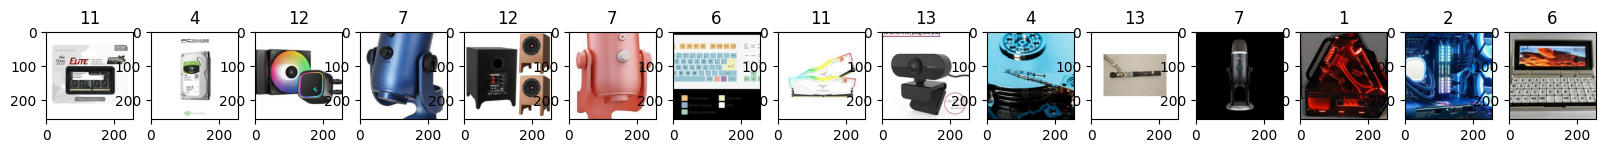

In [18]:
fig , ax = plt.subplots(ncols = 15 , figsize=(20,20))
for idx,img in enumerate(batch[0][:15]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# PRE-PROCESSING

In [14]:
#Scaling the data 
data = data.map(lambda x,y: (x/255, y)) #x->image y->labels

In [15]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[0.98039216, 0.9647059 , 0.9607843 ],
          [0.97647

In [16]:
scaled_iterator = data.as_numpy_iterator()

In [17]:
batch = scaled_iterator.next()

In [18]:
len(batch)

2

In [19]:
batch[0]

array([[[[0.8392157 , 0.8392157 , 0.8392157 ],
         [0.8392157 , 0.8392157 , 0.8392157 ],
         [0.8392157 , 0.8392157 , 0.8392157 ],
         ...,
         [0.8352941 , 0.84313726, 0.8392157 ],
         [0.8352941 , 0.84313726, 0.8392157 ],
         [0.8352941 , 0.84313726, 0.8392157 ]],

        [[0.8352941 , 0.8352941 , 0.8352941 ],
         [0.8352941 , 0.8352941 , 0.8352941 ],
         [0.8352941 , 0.8352941 , 0.8352941 ],
         ...,
         [0.83137256, 0.8392157 , 0.8352941 ],
         [0.83137256, 0.8392157 , 0.8352941 ],
         [0.83137256, 0.8392157 , 0.8352941 ]],

        [[0.827451  , 0.827451  , 0.827451  ],
         [0.827451  , 0.827451  , 0.827451  ],
         [0.83137256, 0.83137256, 0.83137256],
         ...,
         [0.8235294 , 0.83137256, 0.827451  ],
         [0.8235294 , 0.83137256, 0.827451  ],
         [0.8235294 , 0.83137256, 0.827451  ]],

        ...,

        [[0.02352941, 0.02352941, 0.02352941],
         [0.02352941, 0.02352941, 0.02352941]

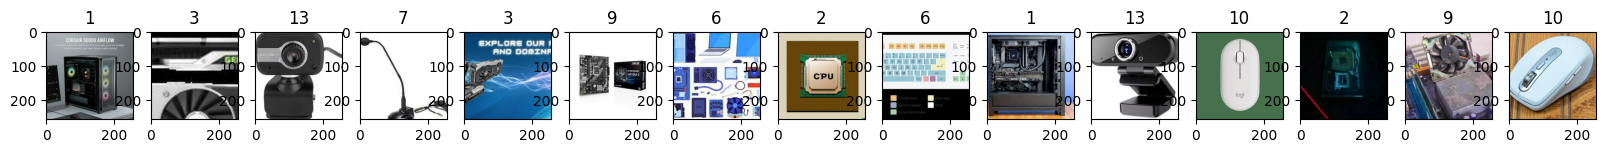

In [25]:
fig , ax = plt.subplots(ncols = 15 , figsize=(20,20))
for idx,img in enumerate(batch[0][:15]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [26]:
len(data)

103

In [20]:
train_size = int(len(data)*.75)
test_size = int(len(data)*.25)

In [28]:
train_size

77

In [29]:
test_size

25

In [21]:
train = data.take(train_size)
test = data.skip(train_size).take(test_size)

In [22]:
val_split = int(train_size*0.1)
validation = train.take(val_split)
train = train.skip(val_split)

In [33]:
len(train)

70

In [34]:
len(test)

25

In [35]:
len(validation)

7

In [59]:
from tensorflow.keras.models import Sequential

In [60]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [61]:
from keras import layers

In [39]:
model1 = Sequential()

In [40]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
len(train)

70

In [42]:
input_shape = (256,256,3)

In [ ]:
input_shape = (256,256,3)

In [44]:
model1.add(layers.Conv2D(16,(3,3),1,activation="relu",name="conv2d1"))

In [45]:
model1.add(layers.MaxPool2D((2,2), name='MaxPool1'))

In [46]:
model1.add(layers.Conv2D(16,3,activation='relu',name='conv2d2'))

In [47]:
model1.add(layers.Activation("relu",name='activate'))

In [48]:
model1.add(layers.MaxPooling2D(2,name='maxpool2'))

In [49]:
model1.add(layers.Flatten(name="flatten"))

In [50]:
model1.add(layers.Dense(256,activation='relu'))

In [51]:
model1.add(Dense(14,activation='softmax'))

In [52]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d1 (Conv2D)                │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool1 (MaxPooling2D)         │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d2 (Conv2D)                │ (None, 125, 125, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activate (Activation)           │ (None, 125, 125, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    15,745,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 14)             │         3,598 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,751,646 (60.09 MB)

 Trainable params: 15,751,646 (60.09 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model1.compile(optimizer='adam',
               loss='SparseCategoricalCrossentropy',
               metrics=['accuracy']
               )

In [54]:
logdir = "D:\\Programming\\PythonProject\\accessoriesclassify\\logs"

In [55]:
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [56]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy',patience=5)

In [57]:
history = model1.fit(train, validation_data=validation, batch_size=64, epochs=50, callbacks=[tensorboard_callbacks])

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 28s 376ms/step - accuracy: 0.0951 - loss: 2.9753 - val_accuracy: 0.1429 - val_loss: 2.4950
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 356ms/step - accuracy: 0.2573 - loss: 2.3318 - val_accuracy: 0.4911 - val_loss: 1.8136
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 348ms/step - accuracy: 0.6546 - loss: 1.2768 - val_accuracy: 0.6339 - val_loss: 1.4629
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 345ms/step - accuracy: 0.8217 - loss: 0.8101 - val_accuracy: 0.7054 - val_loss: 1.2293
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 344ms/step - accuracy: 0.8772 - loss: 0.6362 - val_accuracy: 0.8214 - val_loss: 0.7143
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 343ms/step - accuracy: 0.9092 - loss: 0.4963 - val_accuracy: 0.8839 - val_loss: 0.5581
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 344ms/step - accuracy: 0.9322 - loss: 0.4396 - val_accuracy: 0.9107 - val_loss: 0.3981
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 345ms/step - accuracy: 0.9421 - loss: 0.3278 - val_accu

In [58]:
history.history

{'accuracy': [0.11785714328289032,
  0.3214285671710968,
  0.7276785969734192,
  0.8607142567634583,
  0.8995535969734192,
  0.9299107193946838,
  0.9379464387893677,
  0.9486607313156128,
  0.949999988079071,
  0.9544642567634583,
  0.9513393044471741,
  0.9526785612106323,
  0.9522321224212646,
  0.9571428298950195,
  0.956250011920929,
  0.9535714387893677,
  0.9549106955528259,
  0.9566964507102966,
  0.9535714387893677,
  0.9544642567634583,
  0.9513393044471741,
  0.9580357074737549,
  0.9571428298950195,
  0.9571428298950195,
  0.956250011920929,
  0.956250011920929,
  0.9544642567634583,
  0.9549106955528259,
  0.9526785612106323,
  0.9553571343421936,
  0.9535714387893677,
  0.9544642567634583,
  0.9566964507102966,
  0.9584821462631226,
  0.9535714387893677,
  0.9549106955528259,
  0.9584821462631226,
  0.9549106955528259,
  0.9535714387893677,
  0.9517857432365417,
  0.9508928656578064,
  0.9544642567634583,
  0.9584821462631226,
  0.9535714387893677,
  0.9535714387893677,
 

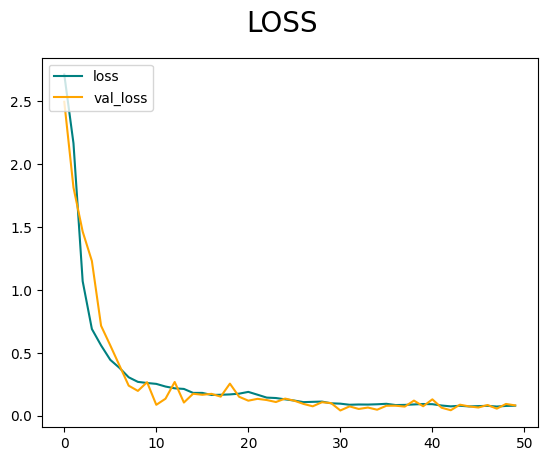

In [59]:
fig = plt.figure()
plt.plot(history.history['loss'],color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('LOSS',fontsize=20)
plt.legend(loc="upper left")
plt.show()

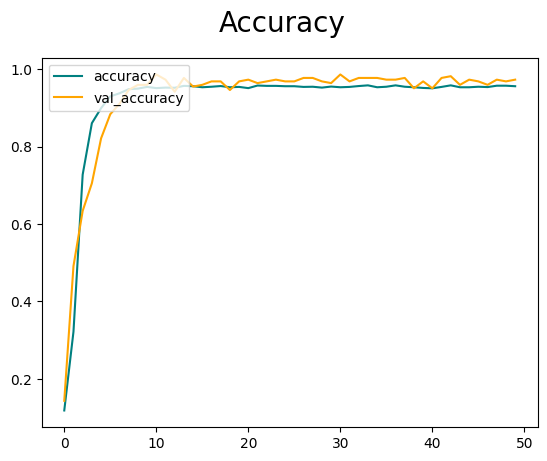

In [60]:
fig = plt.figure()
plt.plot(history.history['accuracy'],color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

# EVALUATION ON TESTING DATA

In [61]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [62]:
model1.evaluate(test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.6244 - loss: 1.6446


[2.1854827404022217, 0.49000000953674316]

# MODEL 2


In [64]:
import keras

In [65]:
seq_model2 = keras.Sequential([layers.Input(input_shape),
                              layers.Conv2D(16, (3,3), activation="relu", name="conv2d1"),
                              layers.MaxPool2D((2,2),name="maxpool1"),
                              layers.Conv2D(16,3,name="conv2d2"),
                              layers.Activation("relu",name="activate"),
                              layers.Conv2D(16, (3,3), activation="relu", name="conv2d3"),
                              layers.MaxPooling2D(2,name="max_pool2"),
                              layers.Flatten(name="flatten"),
                              layers.Dropout(0.3),
                              layers.Dense(524, activation="relu",name="dense1"),
                              layers.Dense(14,activation="softmax",name="outputlayer")])

In [66]:
seq_model2.compile(optimizer='adam',
               loss='SparseCategoricalCrossentropy',
               metrics=['accuracy']
               )

In [67]:
seq_model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d1 (Conv2D)                │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d2 (Conv2D)                │ (None, 125, 125, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activate (Activation)           │ (None, 125, 125, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d3 (Conv2D)                │ (None, 123, 123, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool2 (MaxPooling2D)        │ (None, 61, 61, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 59536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 59536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 524)            │    31,197,388 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputlayer (Dense)             │ (None, 14)             │         7,350 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,209,826 (119.06 MB)

 Trainable params: 31,209,826 (119.06 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
history2 = seq_model2.fit(train, validation_data=validation, batch_size=64, epochs=30, callbacks=[early_stopping])

Epoch 1/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 39s 526ms/step - accuracy: 0.0802 - loss: 5.1749 - val_accuracy: 0.1875 - val_loss: 2.5624
Epoch 2/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 37s 520ms/step - accuracy: 0.2122 - loss: 2.4538 - val_accuracy: 0.2902 - val_loss: 2.2254
Epoch 3/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 40s 566ms/step - accuracy: 0.4490 - loss: 1.8416 - val_accuracy: 0.4286 - val_loss: 1.8298
Epoch 4/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 40s 560ms/step - accuracy: 0.7234 - loss: 1.0206 - val_accuracy: 0.6295 - val_loss: 1.4007
Epoch 5/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 38s 534ms/step - accuracy: 0.8630 - loss: 0.6248 - val_accuracy: 0.8304 - val_loss: 0.8593
Epoch 6/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 588ms/step - accuracy: 0.9047 - loss: 0.4965 - val_accuracy: 0.8705 - val_loss: 0.7134
Epoch 7/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 44s 632ms/step - accuracy: 0.9146 - loss: 0.4827 - val_accuracy: 0.8616 - val_loss: 0.6928
Epoch 8/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 45s 634ms/step - accuracy: 0.9336 - loss: 0.3468 - val_accu

In [69]:
seq_model2.evaluate(test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.6245 - loss: 1.5598


[2.0617406368255615, 0.5137500166893005]

# MODEL 3

In [71]:
model3 = Sequential()

In [72]:
model3.add(layers.Input(input_shape))

In [73]:
model3.add(layers.Conv2D(32,(3,3),1,activation="relu",name="conv2d1"))

In [74]:
model3.add(layers.MaxPool2D((2,2), name='MaxPool1'))

In [75]:
model3.add(layers.Conv2D(64,3,activation='relu',name='conv2d2'))

In [76]:
model3.add(layers.Activation("relu",name='activate'))

In [77]:
model3.add(layers.MaxPooling2D(2,name='Maxpool2'))

In [78]:
model3.add(layers.Flatten(name="flatten"))

In [79]:
model3.add(layers.Dropout(0.5))#drops about 50% of input data i.e. it passes 0  instead of the original value

In [80]:
model3.add(layers.Dense(128,activation='relu'))

In [81]:
model3.add(Dense(14,activation='softmax'))

In [82]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d1 (Conv2D)                │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool1 (MaxPooling2D)         │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d2 (Conv2D)                │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activate (Activation)           │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Maxpool2 (MaxPooling2D)         │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    31,490,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,511,374 (120.21 MB)

 Trainable params: 31,511,374 (120.21 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
model3.compile(optimizer='adam',
               loss='SparseCategoricalCrossentropy',
               metrics=['accuracy']
               )

In [84]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy',patience=3)

In [85]:
history3 = model3.fit(train, validation_data=validation, batch_size=64, epochs=30, callbacks=[early_stopping])

Epoch 1/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.0851 - loss: 6.1478 - val_accuracy: 0.1161 - val_loss: 2.5691
Epoch 2/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.1799 - loss: 2.4794 - val_accuracy: 0.1786 - val_loss: 2.4097
Epoch 3/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.3939 - loss: 1.9686 - val_accuracy: 0.4643 - val_loss: 1.8041
Epoch 4/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.6711 - loss: 1.1901 - val_accuracy: 0.6205 - val_loss: 1.3754
Epoch 5/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.8172 - loss: 0.7213 - val_accuracy: 0.6696 - val_loss: 1.1798
Epoch 6/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.8547 - loss: 0.6279 - val_accuracy: 0.7991 - val_loss: 0.8178
Epoch 7/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.8987 - loss: 0.4951 - val_accuracy: 0.8884 - val_loss: 0.4631
Epoch 8/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 61s 864ms/step - accuracy: 0.9169 - loss: 0.4091 - val_accuracy: 0.9062 - val_lo

In [86]:
model3.evaluate(test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.6177 - loss: 1.9082


[2.558497667312622, 0.49125000834465027]

# MODEL 4

In [88]:
model4 = keras.Sequential([layers.Input(input_shape),
                              layers.Conv2D(8, (3,3), activation="relu", name="conv2d1"),
                              layers.MaxPool2D((2,2),name="maxpool1"),
                              layers.Conv2D(16,3,name="conv2d2"),
                              layers.Activation("relu",name="activate"),
                              layers.Conv2D(32, (3,3), activation="relu", name="conv2d3"),
                              layers.MaxPooling2D(2,name="max_pool2"),
                              layers.Flatten(name="flatten"),
                              layers.Dropout(0.5),
                              layers.Dense(256, activation="relu",name="dense1"),
                              layers.Dense(14,activation="softmax",name="outputlayer")])

In [89]:
model4.compile(optimizer='adam',
               loss='SparseCategoricalCrossentropy',
               metrics=['accuracy']
               )

In [90]:
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d1 (Conv2D)                │ (None, 254, 254, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 127, 127, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d2 (Conv2D)                │ (None, 125, 125, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activate (Activation)           │ (None, 125, 125, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d3 (Conv2D)                │ (None, 123, 123, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool2 (MaxPooling2D)        │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 119072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 119072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │    30,482,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputlayer (Dense)             │ (None, 14)             │         3,598 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,492,318 (116.32 MB)

 Trainable params: 30,492,318 (116.32 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
history4 = model4.fit(train, validation_data=validation, batch_size=64, epochs=30, callbacks=[early_stopping])

Epoch 1/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 36s 490ms/step - accuracy: 0.0856 - loss: 4.7053 - val_accuracy: 0.1027 - val_loss: 2.5733
Epoch 2/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 35s 491ms/step - accuracy: 0.2135 - loss: 2.4046 - val_accuracy: 0.1920 - val_loss: 2.3043
Epoch 3/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 35s 492ms/step - accuracy: 0.4238 - loss: 1.7965 - val_accuracy: 0.5446 - val_loss: 1.6582
Epoch 4/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 34s 487ms/step - accuracy: 0.6923 - loss: 1.1178 - val_accuracy: 0.6295 - val_loss: 1.3591
Epoch 5/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 35s 493ms/step - accuracy: 0.8278 - loss: 0.7035 - val_accuracy: 0.7723 - val_loss: 0.8079
Epoch 6/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 35s 500ms/step - accuracy: 0.8868 - loss: 0.5320 - val_accuracy: 0.8438 - val_loss: 0.6865
Epoch 7/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 34s 486ms/step - accuracy: 0.9217 - loss: 0.4045 - val_accuracy: 0.8973 - val_loss: 0.4443
Epoch 8/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 34s 485ms/step - accuracy: 0.9361 - loss: 0.3620 - val_accu

In [92]:
model4.evaluate(test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.6100 - loss: 1.9072


[2.330528736114502, 0.5062500238418579]

# TESTING THE MODELS

In [47]:
import keras

In [126]:
loaded_model = keras.saving.load_model("model6.keras")

In [49]:
import cv2
from matplotlib import pyplot as plt

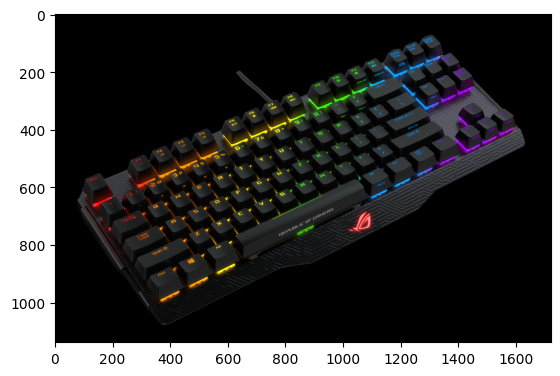

In [243]:
img = cv2.imread(r"D:\Programming\PythonProject\accessoriesclassify\key.png")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [234]:
import numpy as np

In [31]:
import tensorflow as tf

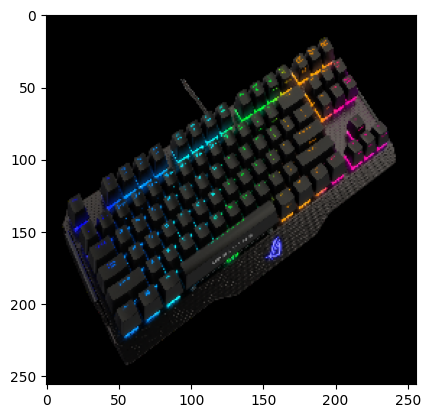

In [244]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [245]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [246]:
np.expand_dims(resize,0)

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [247]:
predict1 = loaded_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [248]:
predict1

array([[5.0138205e-04, 1.5112377e-03, 2.2470802e-01, 3.7364059e-03,
        4.2512463e-03, 1.0908253e-05, 5.4223657e-01, 2.4799403e-04,
        1.4895188e-03, 2.0194489e-01, 1.1933021e-03, 1.8152112e-02,
        1.6447895e-05, 2.5797750e-08]], dtype=float32)

In [249]:
predicted_index = np.argmax(predict1)


In [250]:
class_names = for_categories.class_names

In [251]:
predicted_class = class_names[predicted_index]
print(f"Predicted Class: {predicted_class}")

Predicted Class: keyboard


# MODEL 5

In [62]:
input_shape = (256,256,3)

In [63]:
model5 = Sequential()

In [66]:
model5 = keras.Sequential([layers.Input(input_shape),
                              layers.Conv2D(32, (3,3), activation="relu", name="conv2d1"),
                              layers.MaxPool2D((2,2),name="maxpool1"),
                              layers.Conv2D(64,3,name="conv2d2"),
                              layers.Activation("relu",name="activate"),
                              
                              layers.MaxPooling2D(2,name="max_pool2"),
                              layers.Flatten(name="flatten"),
                              layers.Dropout(0.3),
                              layers.Dense(256, activation="relu",name="dense1"),
                              layers.Dense(14,activation="softmax",name="outputlayer")])

In [67]:
model5.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d1 (Conv2D)                │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d2 (Conv2D)                │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activate (Activation)           │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool2 (MaxPooling2D)        │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │    62,980,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputlayer (Dense)             │ (None, 14)             │         3,598 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,003,342 (240.34 MB)

 Trainable params: 63,003,342 (240.34 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model5.compile(optimizer='adam',
               loss='SparseCategoricalCrossentropy',
               metrics=['accuracy']
               )

In [70]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy',patience=3)

In [71]:
history5 = model5.fit(train, validation_data=validation, batch_size=64, epochs=50, callbacks=[early_stopping])

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.0751 - loss: 8.6072 - val_accuracy: 0.1295 - val_loss: 2.5548
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.1701 - loss: 2.5024 - val_accuracy: 0.3527 - val_loss: 2.1133
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5139 - loss: 1.6275 - val_accuracy: 0.5223 - val_loss: 1.6492
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.7779 - loss: 0.9271 - val_accuracy: 0.6964 - val_loss: 1.1260
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8739 - loss: 0.6821 - val_accuracy: 0.7277 - val_loss: 1.1525
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9061 - loss: 0.4835 - val_accuracy: 0.8170 - val_loss: 0.9578
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9301 - loss: 0.4364 - val_accuracy: 0.8661 - val_loss: 0.7326
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9336 - loss: 0.4025 - val_accuracy: 0.8839 - val_loss:

In [72]:
model5.evaluate(test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 0.6345 - loss: 1.6944


[2.5332791805267334, 0.48124998807907104]

# MODEL 6

In [115]:
from tensorflow import keras
from tensorflow.keras import layers

# Add Data Augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])


In [131]:
model6 = keras.Sequential([
    layers.Input(input_shape),  # Input layer

    # Data Augmentation
    data_augmentation,

    # First Convolutional Block
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPool2D((2,2)),
    
    # Second Convolutional Block
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2),
    
    # Third Convolutional Block
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2),
    
    # Fully Connected Layers
    layers.Flatten(),
    layers.Dropout(0.4),  # Increased dropout to prevent overfitting
    layers.Dense(256, activation="relu"),  
    layers.Dense(128, activation="relu"),  
    layers.Dense(14, activation="softmax")  # Output layer
])


In [157]:
model6.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 252, 252, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 122, 122, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 57, 57, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,036,236 (297.68 MB)

 Trainable params: 26,012,078 (99.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 52,024,158 (198.46 MB)

In [132]:
model6.compile(
    optimizer='adam',  # Lower learning rate for stability
    loss="SparseCategoricalCrossentropy",
    metrics=["accuracy"]
)

In [128]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy',patience=3)

In [133]:
history6 = model6.fit(
    train, 
    validation_data=validation, 
    epochs=50, 
    batch_size=32,
    verbose=1
)


Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.0704 - loss: 2.7056 - val_accuracy: 0.1116 - val_loss: 2.6246
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.1022 - loss: 2.6088 - val_accuracy: 0.1250 - val_loss: 2.6135
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.1145 - loss: 2.5825 - val_accuracy: 0.1562 - val_loss: 2.5138
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.1586 - loss: 2.5116 - val_accuracy: 0.1652 - val_loss: 2.4164
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.1620 - loss: 2.4423 - val_accuracy: 0.2366 - val_loss: 2.3727
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.2160 - loss: 2.4084 - val_accuracy: 0.2946 - val_loss: 2.2520
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.2345 - loss: 2.3493 - val_accuracy: 0.2589 - val_loss: 2.1266
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.2609 - loss: 2.2572 - val_accuracy: 0.2902 - v

In [ ]:
test_loss, test_acc = model6.evaluate(test, verbose=1)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 334ms/step - accuracy: 0.5632 - loss: 1.7919
Test Accuracy: 50.88%
Test Loss: 2.0453


# MODEL 7


In [ ]:
model7 = keras.Sequential([layers.Input(input_shape),
                            data_augmentation,
                              layers.Conv2D(32, (3,3), activation="relu", name="conv2d1"),
                              layers.MaxPool2D((2,2),name="maxpool1"),
                              layers.Conv2D(64,3,name="conv2d2"),
                              layers.Activation("relu",name="activate"),
                              
                              layers.MaxPooling2D(2,name="max_pool2"),
                              layers.Flatten(name="flatten"),
                              layers.Dropout(0.4),
                              layers.Dense(256, activation="relu",name="dense1"),
                              layers.Dense(14,activation="softmax",name="outputlayer")])

In [155]:
model7.compile(
    optimizer='adam', 
    loss="SparseCategoricalCrossentropy",
    metrics=["accuracy"]
)

In [156]:
model7.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d1 (Conv2D)                │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d2 (Conv2D)                │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activate (Activation)           │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool2 (MaxPooling2D)        │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │    62,980,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputlayer (Dense)             │ (None, 14)             │         3,598 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,003,342 (240.34 MB)

 Trainable params: 63,003,342 (240.34 MB)

 Non-trainable params: 0 (0.00 B)

In [158]:
history7 = model7.fit(
    train, 
    validation_data=validation, 
    epochs=50, 
    batch_size=32
)


Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.0888 - loss: 8.3419 - val_accuracy: 0.1473 - val_loss: 2.5912
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.1227 - loss: 2.5924 - val_accuracy: 0.1339 - val_loss: 2.5204
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.1497 - loss: 2.5439 - val_accuracy: 0.2321 - val_loss: 2.4395
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.1728 - loss: 2.4987 - val_accuracy: 0.2545 - val_loss: 2.2811
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.2130 - loss: 2.3796 - val_accuracy: 0.2991 - val_loss: 2.1979
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.2554 - loss: 2.2706 - val_accuracy: 0.3080 - val_loss: 2.2269
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.2590 - loss: 2.2746 - val_accuracy: 0.3125 - val_loss: 2.1166
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.3130 - loss: 2.1639 - val_accuracy: 0.3482 - val_loss:

In [159]:
test_loss, test_acc = model7.evaluate(test, verbose=1)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.5843 - loss: 1.9448
Test Accuracy: 52.13%
Test Loss: 2.3381


In [294]:
test_loss, test_acc = loaded_model.evaluate(test, verbose=1)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.8357 - loss: 0.6998
Test Accuracy: 82.38%
Test Loss: 0.7526


In [359]:
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d1 (Conv2D)                │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool1 (MaxPooling2D)         │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d2 (Conv2D)                │ (None, 125, 125, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activate (Activation)           │ (None, 125, 125, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    15,745,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 14)             │         3,598 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,254,940 (180.26 MB)

 Trainable params: 15,751,646 (60.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,503,294 (120.18 MB)

# TESTING ALL 7 MODELS

In [2]:
import keras

In [3]:
load1 = keras.saving.load_model("model1.keras")
load2 = keras.saving.load_model("seq_model2.keras")
load3 = keras.saving.load_model("model3.keras")
load4 = keras.saving.load_model("model4.keras")
load5 = keras.saving.load_model("model5.keras")
load6 = keras.saving.load_model("model6.keras")
load7 = keras.saving.load_model("model7.keras")

In [39]:
test_loss1, test_acc1 = load1.evaluate(test, verbose=1)
print(f"Test Accuracy: {test_acc1 * 100:.2f}%")
print(f"Test Loss: {test_loss1:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.8627 - loss: 0.5514
Test Accuracy: 85.62%
Test Loss: 0.5887


In [40]:
test_loss2, test_acc2 = load2.evaluate(test, verbose=1)
print(f"Test Accuracy: {test_acc2 * 100:.2f}%")
print(f"Test Loss: {test_loss2:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.8638 - loss: 0.6078
Test Accuracy: 86.00%
Test Loss: 0.6072


In [41]:
test_loss3, test_acc3 = load3.evaluate(test, verbose=1)
print(f"Test Accuracy: {test_acc3 * 100:.2f}%")
print(f"Test Loss: {test_loss3:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step - accuracy: 0.8259 - loss: 0.7840
Test Accuracy: 83.75%
Test Loss: 0.7853


In [42]:
test_loss4, test_acc4 = load4.evaluate(test, verbose=1)
print(f"Test Accuracy: {test_acc4 * 100:.2f}%")
print(f"Test Loss: {test_loss4:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.8379 - loss: 0.7752
Test Accuracy: 84.25%
Test Loss: 0.7826


In [43]:
test_loss5, test_acc5 = load5.evaluate(test, verbose=1)
print(f"Test Accuracy: {test_acc5 * 100:.2f}%")
print(f"Test Loss: {test_loss5:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 364ms/step - accuracy: 0.7220 - loss: 1.0101
Test Accuracy: 74.25%
Test Loss: 0.9478


In [23]:
test_loss6, test_acc6 = load6.evaluate(test, verbose=1)
print(f"Test Accuracy: {test_acc6 * 100:.2f}%")
print(f"Test Loss: {test_loss6:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 368ms/step - accuracy: 0.7037 - loss: 1.0745
Test Accuracy: 71.25%
Test Loss: 1.0421


In [45]:
test_loss7, test_acc7 = load7.evaluate(test, verbose=1)
print(f"Test Accuracy: {test_acc7 * 100:.2f}%")
print(f"Test Loss: {test_loss7:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 200ms/step - accuracy: 0.7852 - loss: 0.8853
Test Accuracy: 78.37%
Test Loss: 0.8899


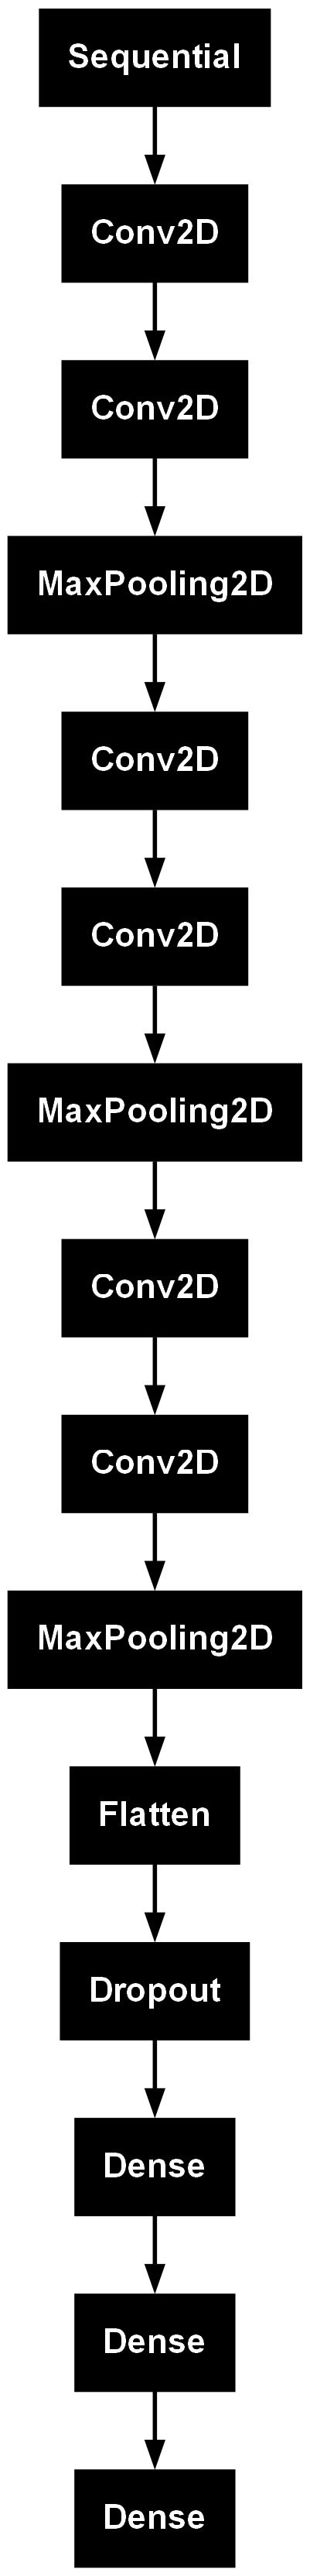

In [101]:
keras.utils.plot_model(load6)

In [159]:
load5.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 252, 252, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 122, 122, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 57, 57, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,036,236 (297.68 MB)

 Trainable params: 26,012,078 (99.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 52,024,158 (198.46 MB)

In [164]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy',patience=3)

In [168]:
history1 = load1.fit(
    train, 
    validation_data=validation, 
    epochs=50,
    callbacks=[early_stopping],
    batch_size=32
)


Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 31s 403ms/step - accuracy: 0.8375 - loss: 0.6085 - val_accuracy: 0.8929 - val_loss: 0.3674
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 28s 399ms/step - accuracy: 0.9430 - loss: 0.2198 - val_accuracy: 0.9018 - val_loss: 0.3303
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 27s 389ms/step - accuracy: 0.9499 - loss: 0.1807 - val_accuracy: 0.9241 - val_loss: 0.3160
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 27s 386ms/step - accuracy: 0.9561 - loss: 0.1286 - val_accuracy: 0.9420 - val_loss: 0.2193
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 28s 390ms/step - accuracy: 0.9570 - loss: 0.1085 - val_accuracy: 0.9509 - val_loss: 0.1635
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 27s 388ms/step - accuracy: 0.9500 - loss: 0.1355 - val_accuracy: 0.9554 - val_loss: 0.1463
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 27s 376ms/step - accuracy: 0.9564 - loss: 0.0949 - val_accuracy: 0.9598 - val_loss: 0.1701
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 23s 325ms/step - accuracy: 0.9508 - loss: 0.1095 - val_accu

In [169]:
import matplotlib.pyplot as plt

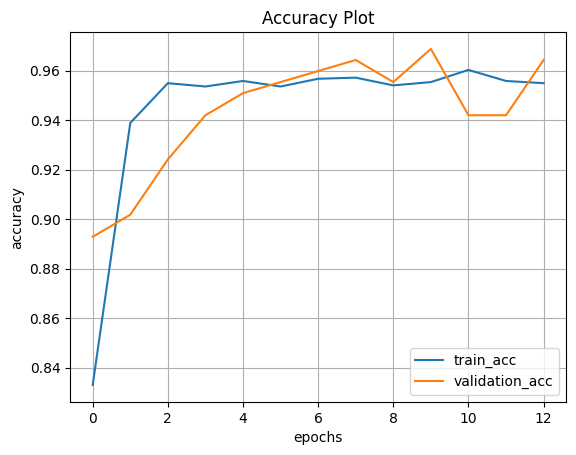

In [170]:
plt.plot(history1.history['accuracy'],label='train_acc')
plt.plot(history1.history['val_accuracy'],label='validation_acc')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy Plot")
plt.legend()
plt.grid()
plt.show()

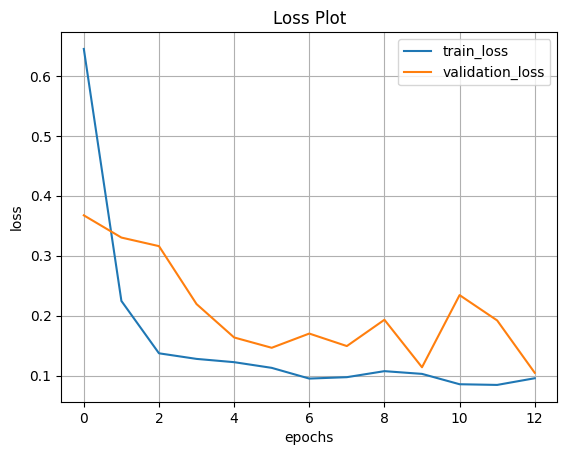

In [172]:
plt.plot(history1.history['loss'],label='train_loss')
plt.plot(history1.history['val_loss'],label='validation_loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss Plot")
plt.legend()
plt.grid()
plt.show()

In [173]:
import json

In [175]:
with open("model1hist.json", "w") as f:
    json.dump(history1.history, f)

In [176]:
history2 = load2.fit(
    train, 
    validation_data=validation, 
    epochs=40,
    batch_size=32
)


Epoch 1/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 45s 583ms/step - accuracy: 0.8588 - loss: 0.5508 - val_accuracy: 0.9062 - val_loss: 0.3185
Epoch 2/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 40s 570ms/step - accuracy: 0.9283 - loss: 0.2374 - val_accuracy: 0.9420 - val_loss: 0.2302
Epoch 3/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 44s 626ms/step - accuracy: 0.9617 - loss: 0.1498 - val_accuracy: 0.9464 - val_loss: 0.2008
Epoch 4/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 44s 624ms/step - accuracy: 0.9548 - loss: 0.1574 - val_accuracy: 0.9464 - val_loss: 0.2303
Epoch 5/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 44s 626ms/step - accuracy: 0.9519 - loss: 0.1462 - val_accuracy: 0.9375 - val_loss: 0.2580
Epoch 6/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 48s 685ms/step - accuracy: 0.9476 - loss: 0.1668 - val_accuracy: 0.9554 - val_loss: 0.1706
Epoch 7/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 51s 717ms/step - accuracy: 0.9623 - loss: 0.1079 - val_accuracy: 0.9375 - val_loss: 0.2279
Epoch 8/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 47s 669ms/step - accuracy: 0.9478 - loss: 0.1446 - val_accu

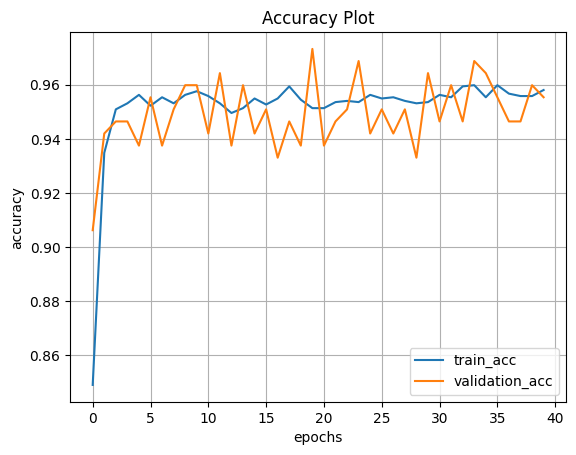

In [177]:
plt.plot(history2.history['accuracy'],label='train_acc')
plt.plot(history2.history['val_accuracy'],label='validation_acc')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy Plot")
plt.legend()
plt.grid()
plt.show()

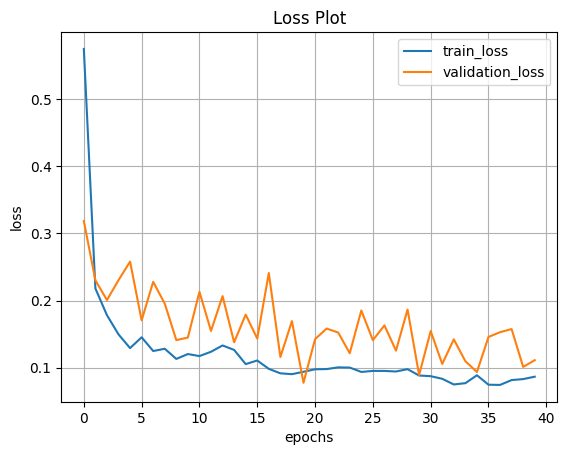

In [198]:
plt.plot(history2.history['loss'],label='train_loss')
plt.plot(history2.history['val_loss'],label='validation_loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss Plot")
plt.legend()
plt.grid()
plt.show()

In [179]:
with open("model2hist.json", "w") as f:
    json.dump(history2.history, f)

In [194]:
history3 = load3.fit(
    train, 
    validation_data=validation, 
    epochs=40,
    batch_size=32
)


Epoch 1/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.8419 - loss: 0.7174 - val_accuracy: 0.9107 - val_loss: 0.4433
Epoch 2/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9256 - loss: 0.3459 - val_accuracy: 0.9107 - val_loss: 0.3873
Epoch 3/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9400 - loss: 0.2646 - val_accuracy: 0.9286 - val_loss: 0.3166
Epoch 4/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9437 - loss: 0.2406 - val_accuracy: 0.9241 - val_loss: 0.3163
Epoch 5/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9480 - loss: 0.2383 - val_accuracy: 0.9509 - val_loss: 0.2786
Epoch 6/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9524 - loss: 0.1973 - val_accuracy: 0.9509 - val_loss: 0.2640
Epoch 7/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 63s 894ms/step - accuracy: 0.9572 - loss: 0.1572 - val_accuracy: 0.9509 - val_loss: 0.2281
Epoch 8/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 59s 834ms/step - accuracy: 0.9624 - loss: 0.1446 - val_accuracy: 0.9598 - val

In [195]:
with open("model3hist.json", "w") as f:
    json.dump(history3.history, f)

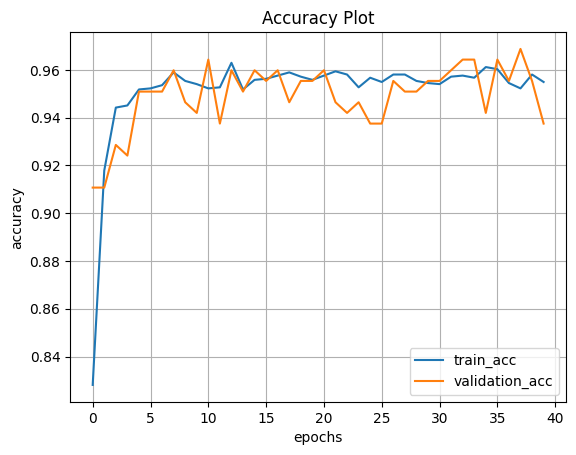

In [197]:
plt.plot(history3.history['accuracy'],label='train_acc')
plt.plot(history3.history['val_accuracy'],label='validation_acc')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy Plot")
plt.legend()
plt.grid()
plt.show()

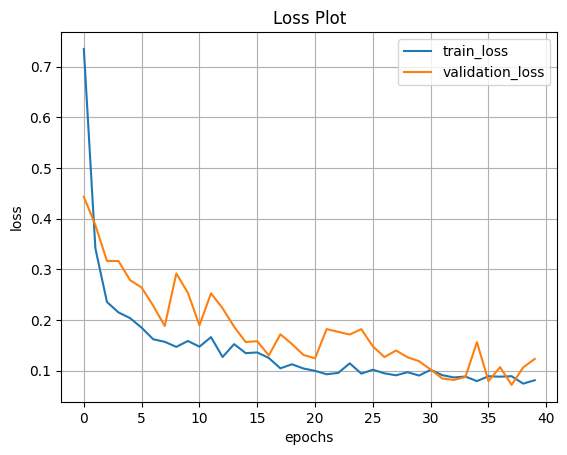

In [199]:
plt.plot(history3.history['loss'],label='train_loss')
plt.plot(history3.history['val_loss'],label='validation_loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss Plot")
plt.legend()
plt.grid()
plt.show()

In [200]:
test_loss3, test_acc3 = load3.evaluate(test, verbose=1)
print(f"Test Accuracy: {test_acc3 * 100:.2f}%")
print(f"Test Loss: {test_loss3:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.9002 - loss: 0.5056
Test Accuracy: 85.62%
Test Loss: 0.7138


In [201]:
history4 = load4.fit(
    train, 
    validation_data=validation, 
    epochs=40,
    batch_size=32
)


Epoch 1/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 46s 611ms/step - accuracy: 0.8489 - loss: 0.6437 - val_accuracy: 0.8929 - val_loss: 0.4582
Epoch 2/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 79s 587ms/step - accuracy: 0.9321 - loss: 0.2571 - val_accuracy: 0.9107 - val_loss: 0.4668
Epoch 3/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 42s 591ms/step - accuracy: 0.9487 - loss: 0.2347 - val_accuracy: 0.9464 - val_loss: 0.2772
Epoch 4/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 42s 593ms/step - accuracy: 0.9519 - loss: 0.2034 - val_accuracy: 0.9375 - val_loss: 0.3206
Epoch 5/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 42s 594ms/step - accuracy: 0.9509 - loss: 0.1897 - val_accuracy: 0.9286 - val_loss: 0.3955
Epoch 6/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 36s 516ms/step - accuracy: 0.9468 - loss: 0.2136 - val_accuracy: 0.9375 - val_loss: 0.3307
Epoch 7/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 42s 589ms/step - accuracy: 0.9515 - loss: 0.1976 - val_accuracy: 0.9554 - val_loss: 0.1975
Epoch 8/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 42s 592ms/step - accuracy: 0.9532 - loss: 0.1935 - val_accu

In [202]:
with open("model4hist.json", "w") as f:
    json.dump(history4.history, f)

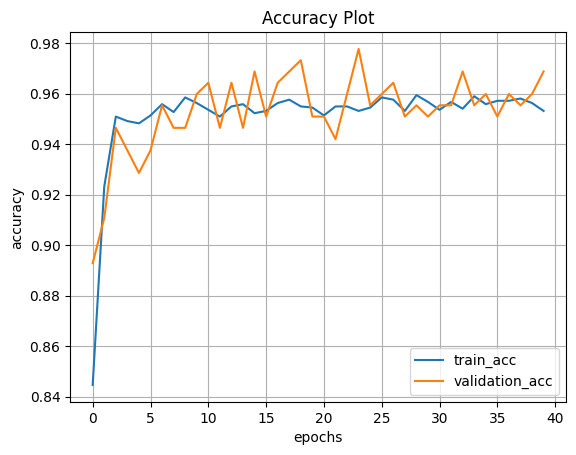

In [203]:
plt.plot(history4.history['accuracy'],label='train_acc')
plt.plot(history4.history['val_accuracy'],label='validation_acc')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy Plot")
plt.legend()
plt.grid()
plt.show()

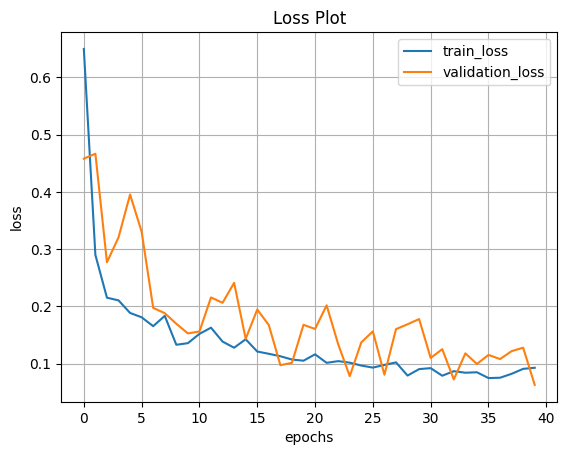

In [204]:
plt.plot(history4.history['loss'],label='train_loss')
plt.plot(history4.history['val_loss'],label='validation_loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss Plot")
plt.legend()
plt.grid()
plt.show()

In [205]:
test_loss4, test_acc4 = load4.evaluate(test, verbose=1)
print(f"Test Accuracy: {test_acc4 * 100:.2f}%")
print(f"Test Loss: {test_loss4:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.8898 - loss: 0.5038
Test Accuracy: 86.62%
Test Loss: 0.6540


In [206]:
history5 = load5.fit(
    train, 
    validation_data=validation, 
    epochs=40,
    batch_size=32
)


Epoch 1/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.6573 - loss: 1.1723 - val_accuracy: 0.7545 - val_loss: 0.8400
Epoch 2/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.6405 - loss: 1.1540 - val_accuracy: 0.6473 - val_loss: 0.9544
Epoch 3/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.6718 - loss: 1.0705 - val_accuracy: 0.7545 - val_loss: 0.8383
Epoch 4/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.6990 - loss: 0.9917 - val_accuracy: 0.7277 - val_loss: 0.8141
Epoch 5/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.7045 - loss: 0.9562 - val_accuracy: 0.7634 - val_loss: 0.7361
Epoch 6/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.6748 - loss: 1.0018 - val_accuracy: 0.7188 - val_loss: 0.9403
Epoch 7/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.6733 - loss: 1.0632 - val_accuracy: 0.6741 - val_loss: 0.8889
Epoch 8/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.6683 - loss: 1.0363 - val_accuracy: 0.7723 - v

In [207]:
with open("model5hist.json", "w") as f:
    json.dump(history5.history, f)

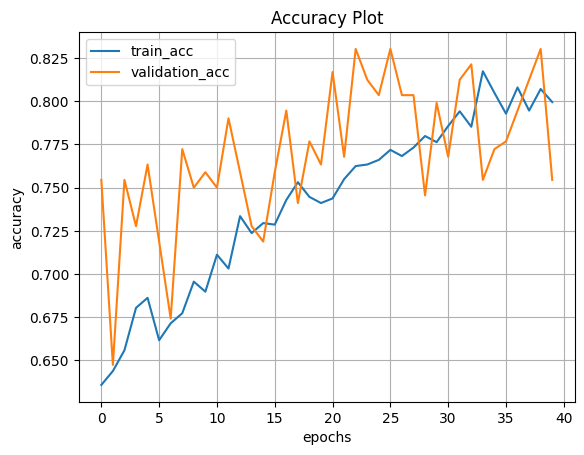

In [208]:
plt.plot(history5.history['accuracy'],label='train_acc')
plt.plot(history5.history['val_accuracy'],label='validation_acc')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy Plot")
plt.legend()
plt.grid()
plt.show()

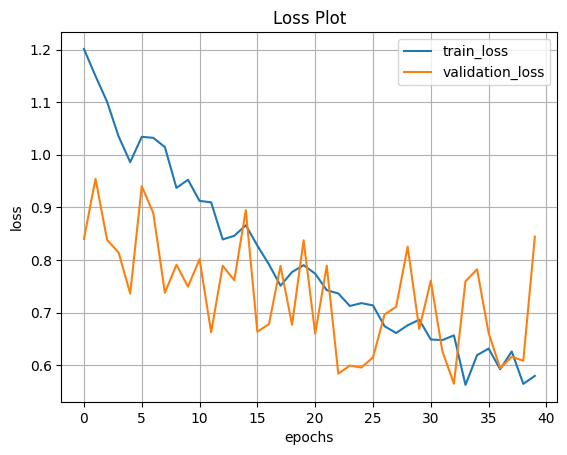

In [209]:
plt.plot(history5.history['loss'],label='train_loss')
plt.plot(history5.history['val_loss'],label='validation_loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss Plot")
plt.legend()
plt.grid()
plt.show()

In [210]:
history6 = load6.fit(
    train, 
    validation_data=validation, 
    epochs=40,
    batch_size=32
)


Epoch 1/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.6650 - loss: 1.1582 - val_accuracy: 0.7054 - val_loss: 0.9109
Epoch 2/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.6450 - loss: 1.1251 - val_accuracy: 0.7143 - val_loss: 0.8913
Epoch 3/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.6628 - loss: 1.0605 - val_accuracy: 0.7500 - val_loss: 0.8242
Epoch 4/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.6854 - loss: 1.0490 - val_accuracy: 0.7857 - val_loss: 0.7043
Epoch 5/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.6878 - loss: 0.9988 - val_accuracy: 0.7411 - val_loss: 0.7954
Epoch 6/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.6910 - loss: 0.9970 - val_accuracy: 0.6875 - val_loss: 0.9459
Epoch 7/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.6741 - loss: 1.0011 - val_accuracy: 0.6964 - val_loss: 0.9073
Epoch 8/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.7038 - loss: 0.9725 - val_accuracy: 0.7768 - v

In [211]:
with open("model6hist.json", "w") as f:
    json.dump(history6.history, f)

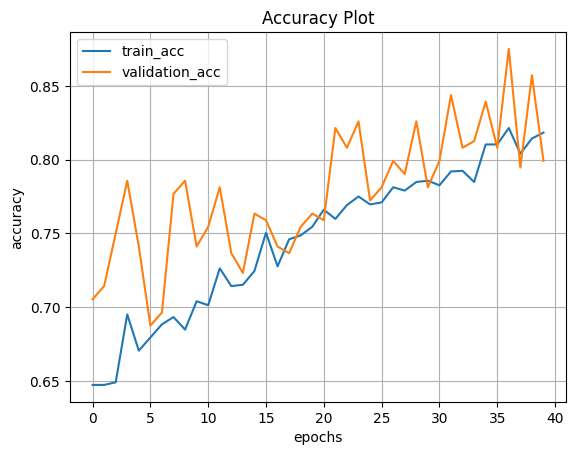

In [213]:
plt.plot(history6.history['accuracy'],label='train_acc')
plt.plot(history6.history['val_accuracy'],label='validation_acc')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy Plot")
plt.legend()
plt.grid()
plt.show()

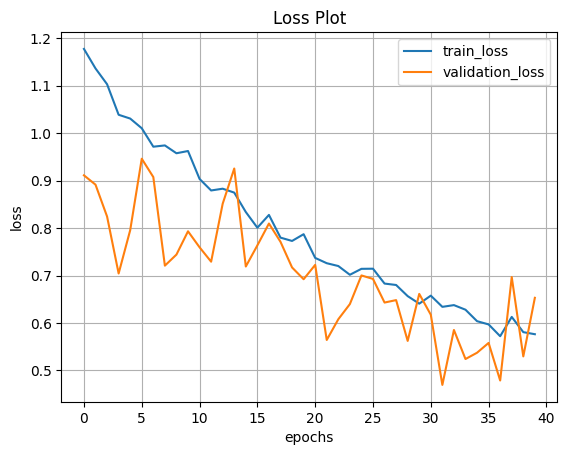

In [214]:
plt.plot(history6.history['loss'],label='train_loss')
plt.plot(history6.history['val_loss'],label='validation_loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss Plot")
plt.legend()
plt.grid()
plt.show()

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

seq_model4 = Sequential(name="model4_CNN")

In [37]:
seq_model4.add(Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3), name="Conv2D_layer1"))
seq_model4.add(BatchNormalization(name="BatchNorm1"))
seq_model4.add(MaxPooling2D((2, 2), name="MaxPooling1"))

seq_model4.add(Conv2D(64, (3, 3), activation="relu", name="Conv2D_layer2"))
seq_model4.add(BatchNormalization(name="BatchNorm2"))
seq_model4.add(MaxPooling2D((2, 2), name="MaxPooling2"))

seq_model4.add(Conv2D(128, (3, 3), activation="relu", name="Conv2D_layer3"))
seq_model4.add(BatchNormalization(name="BatchNorm3"))
seq_model4.add(MaxPooling2D((2, 2), name="MaxPooling3"))

seq_model4.add(Conv2D(256, (3, 3), activation="relu", name="Conv2D_layer4"))
seq_model4.add(BatchNormalization(name="BatchNorm4"))
seq_model4.add(MaxPooling2D((2, 2), name="MaxPooling4"))

seq_model4.add(GlobalAveragePooling2D(name="GlobalAvgPool"))

seq_model4.add(Dense(512, activation="relu", name="Dense_layer1"))
seq_model4.add(Dropout(0.6, name="Dropout1"))

seq_model4.add(Dense(14, activation="softmax", name="Output_layer"))

In [38]:
optimizer = Adam(learning_rate=0.0001)
seq_model4.compile(optimizer=optimizer, loss="SparseCategoricalCrossentropy", metrics=["accuracy"])

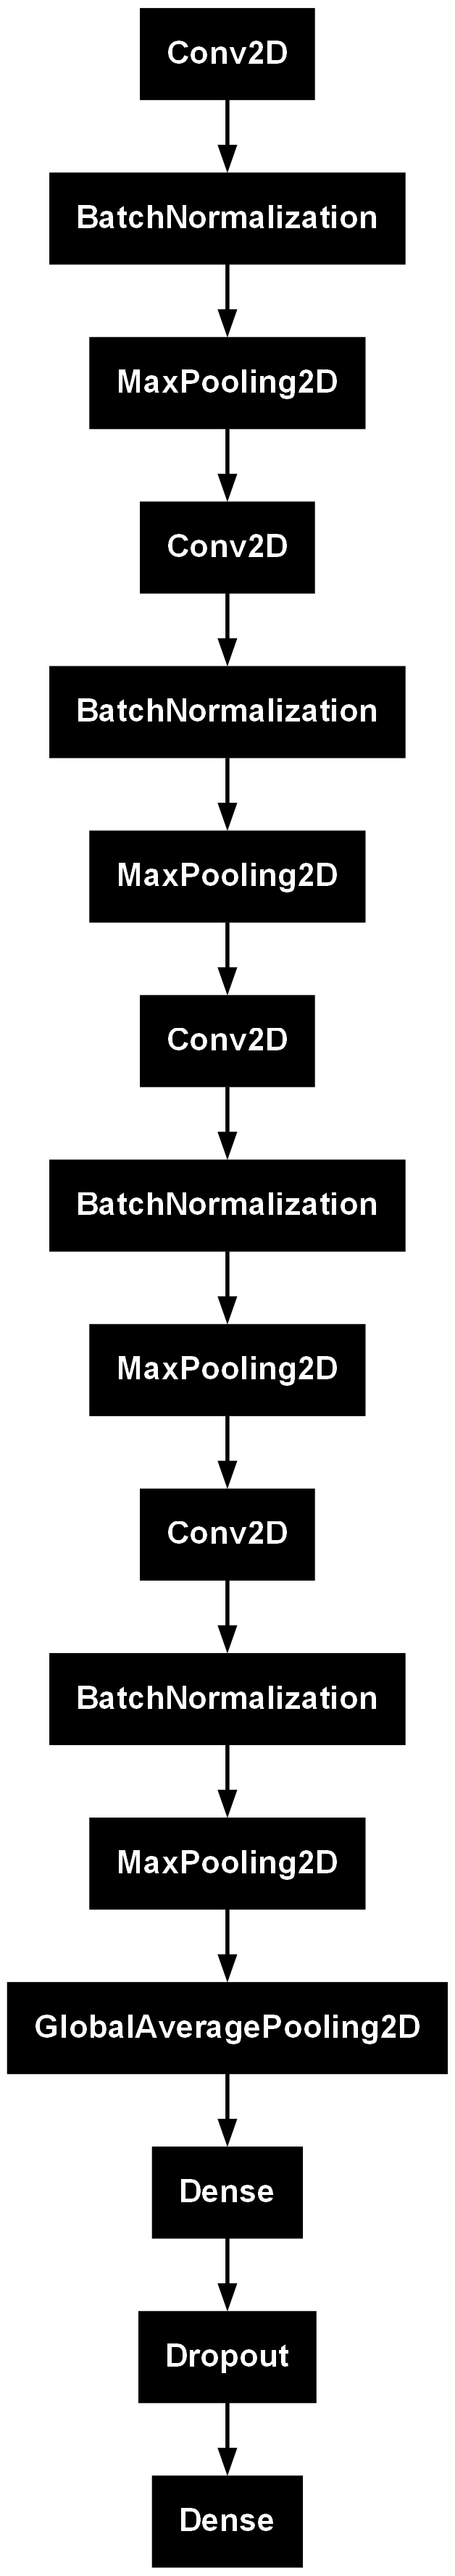

In [27]:
keras.utils.plot_model(seq_model4)

In [31]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint,EarlyStopping

In [39]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
reduce_lr= ReduceLROnPlateau(monitor = 'val_loss',factor=0.5,patience=3,min_lr=1e-6)
model_checkpoint = ModelCheckpoint('model8.keras',monitor='val_accuracy',save_best_only=True)

In [40]:
callbacks = [early_stopping,reduce_lr,model_checkpoint]

In [41]:
history8 = seq_model4.fit(
    train, 
    validation_data=validation, 
    epochs=50,
    callbacks=callbacks
)


Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.0962 - loss: 2.8666 - val_accuracy: 0.0714 - val_loss: 2.6740 - learning_rate: 1.0000e-04
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.1788 - loss: 2.5009 - val_accuracy: 0.0714 - val_loss: 2.7142 - learning_rate: 1.0000e-04
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.1998 - loss: 2.4121 - val_accuracy: 0.1071 - val_loss: 2.7682 - learning_rate: 1.0000e-04
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.2357 - loss: 2.2805 - val_accuracy: 0.0759 - val_loss: 2.7780 - learning_rate: 1.0000e-04
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.2539 - loss: 2.2523 - val_accuracy: 0.0938 - val_loss: 2.7190 - learning_rate: 5.0000e-05
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.3028 - loss: 2.1904 - val_accuracy: 0.1116 - val_loss: 2.5146 - learning_rate: 5.0000e-05
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.2751 

In [42]:
import gradio as gr
import tensorflow as tf
import numpy as np
import cv2
from tensorflow import keras
import matplotlib.pyplot as p

c:\Users\royka\anaconda3\envs\deeplearn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [44]:
import keras

In [45]:
loaded_model = keras.saving.load_model("model6.keras")

In [46]:
class_names = for_categories.class_names

In [47]:
def predict_image(image):
    # Read and preprocess image
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert to BGR format if needed
    resized_img = tf.image.resize(image, (256, 256))
    normalized_img = resized_img / 255.0  # Normalize the image
    
    # Predict
    predictions = loaded_model.predict(np.expand_dims(normalized_img, 0))
    predicted_index = np.argmax(predictions)
    predicted_class = class_names[predicted_index]
    
    # Display image with matplotlib
    plt.imshow(resized_img.numpy().astype(int))
    plt.axis('off')
    plt.show()
    
    return predicted_class

In [ ]:
with gr.Blocks() as demo:
    gr.Markdown("# Image Classifier")
    with gr.Row():
        with gr.Column():
            image_input = gr.Image(type="numpy", label="Upload Image")
        with gr.Column():
            output_text = gr.Textbox(label="Predicted Class")
    
    submit_button = gr.Button("Classify")
    submit_button.click(fn=predict_image, inputs=image_input, outputs=output_text)

# Launch the Gradio interface
demo.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


C:\Users\royka\AppData\Local\Temp\ipykernel_8432\1650313547.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


C:\Users\royka\AppData\Local\Temp\ipykernel_8432\1650313547.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


C:\Users\royka\AppData\Local\Temp\ipykernel_8432\1650313547.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


C:\Users\royka\AppData\Local\Temp\ipykernel_8432\1650313547.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


C:\Users\royka\AppData\Local\Temp\ipykernel_8432\1650313547.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


C:\Users\royka\AppData\Local\Temp\ipykernel_8432\1650313547.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


C:\Users\royka\AppData\Local\Temp\ipykernel_8432\1650313547.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


C:\Users\royka\AppData\Local\Temp\ipykernel_8432\1650313547.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


C:\Users\royka\AppData\Local\Temp\ipykernel_8432\1650313547.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


C:\Users\royka\AppData\Local\Temp\ipykernel_8432\1650313547.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


C:\Users\royka\AppData\Local\Temp\ipykernel_8432\1650313547.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


C:\Users\royka\AppData\Local\Temp\ipykernel_8432\1650313547.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "c:\Users\royka\anaconda3\envs\deeplearn\Lib\site-packages\uvicorn\protocols\http\h11_impl.py", line 403, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\royka\anaconda3\envs\deeplearn\Lib\site-packages\uvicorn\middleware\proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\royka\anaconda3\envs\deeplearn\Lib\site-packages\fastapi\applications.py", line 1054, in __call__
    await super().__call__(scope, receive, send)
  File "c:\Users\royka\anaconda3\envs\deeplearn\Lib\site-packages\starlette\applications.py", line 112, in __call__
    await self.middleware

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


C:\Users\royka\AppData\Local\Temp\ipykernel_8432\1650313547.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


C:\Users\royka\AppData\Local\Temp\ipykernel_8432\1650313547.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
